<a href="https://colab.research.google.com/github/geanmatheus/pos-puc-minas/blob/main/Correla%C3%A7%C3%A3o_BTC_SP500_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
a = 'a'
a

'a'

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 16.7 MB/s eta 0:00:00


In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
sp500 = yf.Ticker("%5EGSPC")

In [ ]:
sp500

In [ ]:
sp500_hist = sp500.history(period='12y')

In [ ]:
btc = yf.download("BTC-USD", start="2022-02-14", end="2023-02-14")
#sp500 = yf.download("^GSPC", start="2012-01-01", end="2022-11-10")

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
btc[btc.index == '2022-06-28'].shift(-1,'d')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-27,1824.199951,1826.0,1817.5,1817.5,1817.5,391


In [ ]:
btc2 = (btc['Adj Close'] - btc['Adj Close'].shift(-1,'d'))*-1

In [ ]:
btc2

Date
2012-01-02          NaN
2012-01-03    12.200073
2012-01-04     7.500000
2012-01-05    -3.300049
2012-01-06          NaN
                ...    
2022-06-24          NaN
2022-06-26          NaN
2022-06-27    -3.400024
2022-06-28    -3.800049
2022-06-29          NaN
Name: Adj Close, Length: 3211, dtype: float64

In [ ]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-14,16352.028320,17109.324219,15872.941406,16618.199219,16618.199219,49630243054
2022-11-15,16617.484375,17051.962891,16542.550781,16884.613281,16884.613281,36599436183
2022-11-16,16884.341797,16960.294922,16430.111328,16669.439453,16669.439453,33925512989
2022-11-17,16670.425781,16726.439453,16460.683594,16687.517578,16687.517578,27868914022
2022-11-18,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609


In [ ]:
sp5002 = (sp500['Adj Close'] - sp500['Adj Close'].shift(-1,'d'))*-1

In [ ]:
correlacao =  pd.concat([btc2, sp5002], axis=1, keys=['df1', 'df2'])

In [ ]:
sp500['Adj Close'] = sp500['Adj Close'] - (sp500['Adj Close'] -1) 10,5

In [ ]:
correlacao =  pd.concat([btc['Adj Close'], sp500['Adj Close']], axis=1, keys=['df1', 'df2'])

In [ ]:
correlacao

,df1,df2
Date,,
2012-01-03 05:00:00+00:00,NaN,1277.060059
2012-01-04 05:00:00+00:00,NaN,1277.300049
2012-01-05 05:00:00+00:00,NaN,1281.060059
2012-01-06 05:00:00+00:00,NaN,1277.810059
2012-01-09 05:00:00+00:00,NaN,1280.699951
...,...,...
2022-10-09 00:00:00+00:00,19446.425781,NaN
2022-10-10 00:00:00+00:00,19141.484375,NaN
2022-10-10 04:00:00+00:00,NaN,3612.389893


In [ ]:
correlacao.corr(method='kendall', min_periods=1)

,df1,df2
df1,1.0,NaN
df2,NaN,1.0


In [ ]:
correlacao.corr(method='pearson', min_periods=1)

,df1,df2
df1,1.0,NaN
df2,NaN,1.0


In [ ]:
correlacao.corr(method='spearman', min_periods=1)

,df1,df2
df1,1.000000,0.422425
df2,0.422425,1.000000


In [ ]:
forecast_btc = btc.reset_index(level=0)

In [ ]:
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
forecast_btc.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace = True)

In [ ]:
forecast_btc.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace = True)

In [ ]:
forecast_btc

,ds,y
0,2022-02-14,42586.917969
1,2022-02-15,44575.203125
2,2022-02-16,43961.859375
3,2022-02-17,40538.011719
4,2022-02-18,40030.976562
...,...,...
360,2023-02-09,21819.039062
361,2023-02-10,21651.183594
362,2023-02-11,21870.875000
363,2023-02-12,21788.203125


In [ ]:
pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import holidays

In [ ]:
holidays2=  holidays.XNYS() + holidays.CN()

In [ ]:
holidays_dict = holidays.XNYS() + holidays.CN()
holiday_list = [(key, value) for key, value in holidays_dict.items()]

In [ ]:
holiday_list

[]

In [ ]:
feriados = pd.DataFrame.from_records(holiday_list, columns=["ds", "holiday"])

In [ ]:
feriados

,ds,holiday


In [ ]:
forecast_btc

NameError: ignored

In [ ]:
import holidays

# Create holiday calendars for XNYS and CN
xnys_cal = holidays.XNYS()
cn_cal = holidays.CN()

# Get the holiday lists from the calendars
xnys_holidays = list(xnys_cal.holidays())
cn_holidays = list(cn_cal.holidays())

# Combine the two holiday lists into one
holidays_dict = xnys_holidays + cn_holidays

# Create a list of tuples with the date and holiday name for each holiday
holiday_list = [(date, holiday) for date, holiday in holidays_dict.items()]

# Create a DataFrame from the holiday list
feriados = pd.DataFrame.from_records(holiday_list, columns=["ds", "holiday"])

AttributeError: ignored

In [ ]:
forecast_btc['ds'] = pd.to_datetime(forecast_btc['ds'] ).dt.date



In [ ]:
m = Prophet()
m.fit(forecast_btc)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzgxvl9y/6024x6l0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzgxvl9y/dxby2xpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17674', 'data', 'file=/tmp/tmpxzgxvl9y/6024x6l0.json', 'init=/tmp/tmpxzgxvl9y/dxby2xpz.json', 'output', 'file=/tmp/tmpxzgxvl9y/prophet_modelf9t8exr7/prophet_model-20230214235916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:59:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:59:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
390,2023-03-11
391,2023-03-12
392,2023-03-13
393,2023-03-14
394,2023-03-15


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
390,2023-03-11,24164.780540,21637.136496,26689.178757
391,2023-03-12,24187.410734,21355.423078,26659.510045
392,2023-03-13,24339.462485,21451.042440,26946.318242
393,2023-03-14,24488.458220,21741.401990,27320.324074
394,2023-03-15,24605.155667,21999.861556,27475.307370


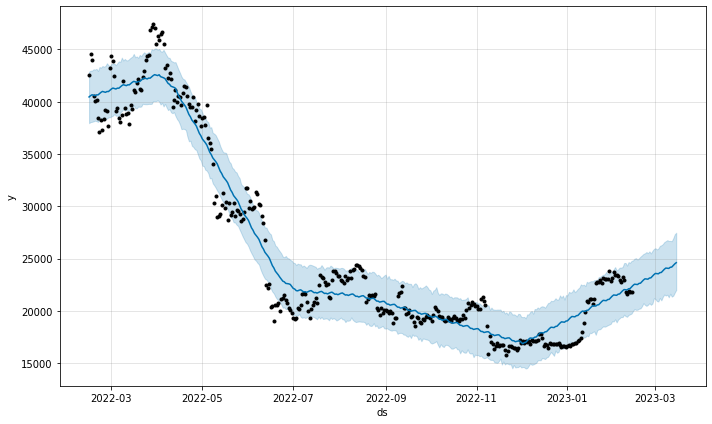

In [ ]:
fig1 = m.plot(forecast)


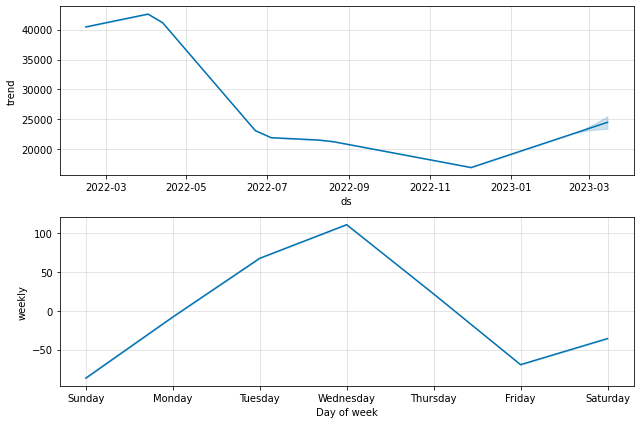

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)


In [ ]:
pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqk5_z58x/gplxdo47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqk5_z58x/ppjy8dna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7763', 'data', 'file=/tmp/tmpqk5_z58x/gplxdo47.json', 'init=/tmp/tmpqk5_z58x/ppjy8dna.json', 'output', 'file=/tmp/tmpqk5_z58x/prophet_modele4j5x1u3/prophet_model-20230228235411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


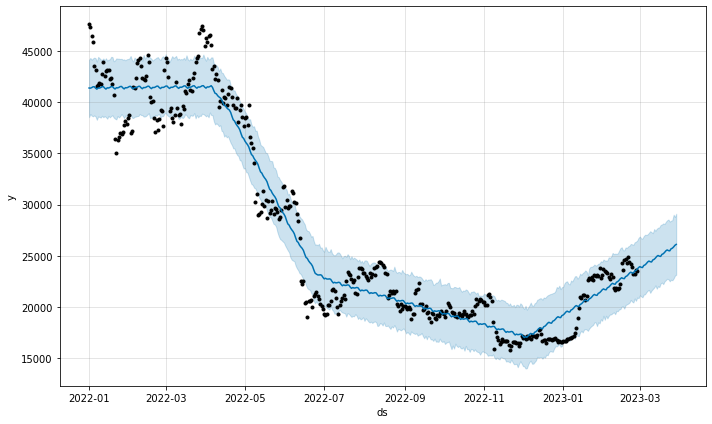

In [ ]:
# Importe apenas os módulos necessários
from prophet import Prophet
import yfinance as yf
from datetime import date
import holidays
import pandas as pd

# Definir os feriados da bolsa americana e chineses
us_holidays = holidays.US()
cn_holidays = holidays.China()

# Cria um dataframe com os feriados a serem usados
us_holidays_df = pd.DataFrame(list(us_holidays.items()), columns=['ds', 'holiday'])
cn_holidays_df = pd.DataFrame(list(cn_holidays.items()), columns=['ds', 'holiday'])
holidays_df = pd.concat([us_holidays_df, cn_holidays_df], ignore_index=True)

# Baixe os dados do Yahoo Finance
btc = yf.download("BTC-USD", start="2022-01-01", end="2023-02-28")

# Preparando os dados para o Prophet
forecast_btc = btc.reset_index()
forecast_btc = forecast_btc[['Date', 'Adj Close']]
forecast_btc.columns = ['ds', 'y']
forecast_btc['ds'] = pd.to_datetime(forecast_btc['ds']).dt.date

# Cria um modelo Prophet e ajusta aos dados
model = Prophet(holidays=holidays_df)
model.fit(forecast_btc)

# Prever 30 dias à frente
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plota a previsão
fig1 = model.plot(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mnny71f/pt20kknw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mnny71f/z1nv9val.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39823', 'data', 'file=/tmp/tmp_mnny71f/pt20kknw.json', 'init=/tmp/tmp_mnny71f/z1nv9val.json', 'output', 'file=/tmp/tmp_mnny71f/prophet_modelbs658ayd/prophet_model-20230321223931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:39:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


22:39:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE: 15.82%


KeyError: ignored

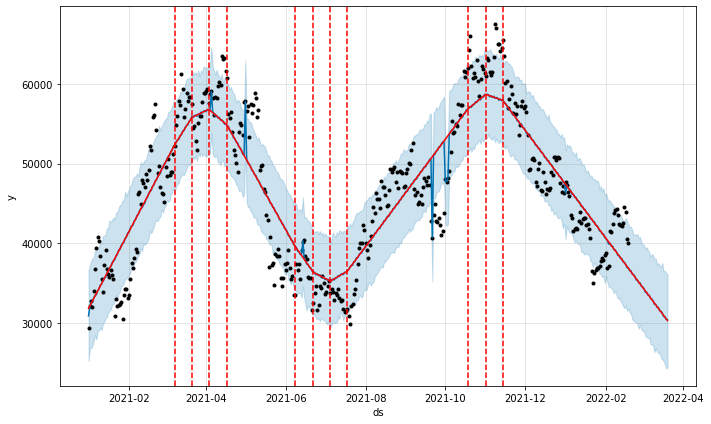

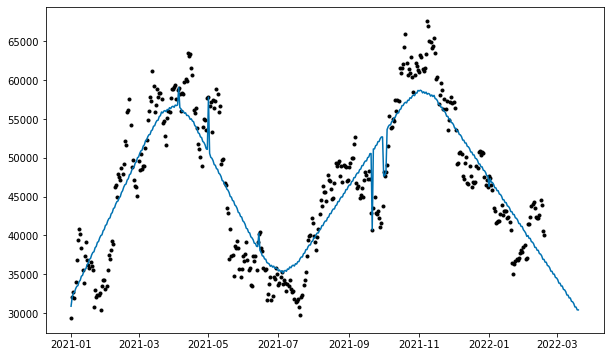

In [ ]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Download dos dados
btc = yf.download("BTC-USD", start="2021-01-01", end="2022-03-21")

# Preparação dos dados para o modelo
forecast_btc = btc.reset_index(level=0)
forecast_btc.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
forecast_btc.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)
forecast_btc['ds'] = pd.to_datetime(forecast_btc['ds']).dt.date

# Divisão em conjuntos de treino e teste
train = forecast_btc[:-30]
test = forecast_btc[-30:]

# Criação do modelo
m = Prophet()
m.add_country_holidays(country_name='US')  # Feriados americanos
m.add_country_holidays(country_name='CN')  # Feriados chineses
m.fit(train)

# Previsão
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

# Plot dos resultados
fig1 = m.plot(forecast)
add_changepoints_to_plot(fig1.gca(), m, forecast)

# Comparação entre os resultados da previsão e os valores reais do conjunto de teste
df = forecast.set_index('ds')[['yhat']].join(test.set_index('ds').y).reset_index()
df['mape'] = (df['y'] - df['yhat']).abs() / df['y']
print('MAPE: {:.2%}'.format(df['mape'].mean()))
fig2 = m.plot(df)
fig2.gca().set_title('MAPE: {:.2%}'.format(df['mape'].mean()))


[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mnny71f/9pdo8ok_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mnny71f/ch0fu0h_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22238', 'data', 'file=/tmp/tmp_mnny71f/9pdo8ok_.json', 'init=/tmp/tmp_mnny71f/ch0fu0h_.json', 'output', 'file=/tmp/tmp_mnny71f/prophet_modelhmvwsf_2/prophet_model-20230321225457.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


22:54:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE: 6.39%


Text(0.5, 1.0, 'MAPE: 6.39%')

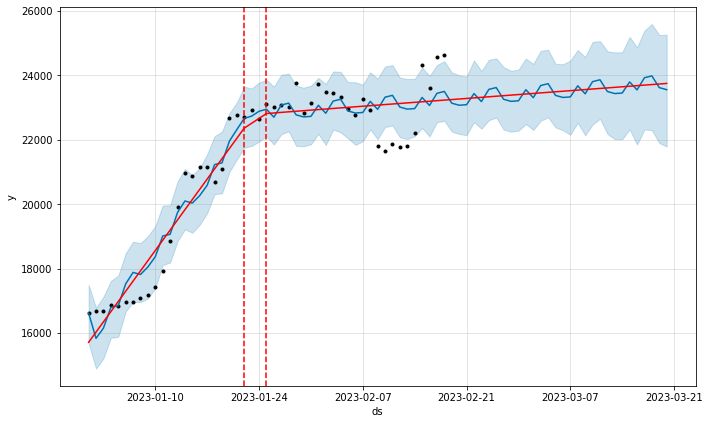

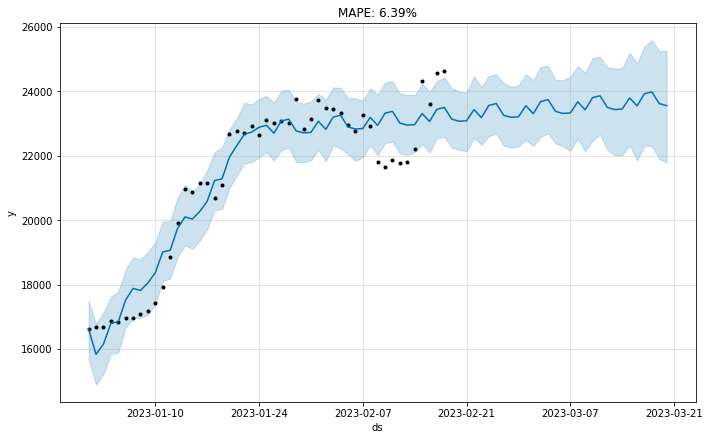

In [ ]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Download dos dados
btc = yf.download("BTC-USD", start="2023-01-01", end="2023-03-21")

# Preparação dos dados para o modelo
forecast_btc = btc.reset_index(level=0)
forecast_btc.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
forecast_btc.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)
forecast_btc['ds'] = pd.to_datetime(forecast_btc['ds']).dt.date

# Divisão em conjuntos de treino e teste
train = forecast_btc[:-30]
test = forecast_btc[-30:]

# Criação do modelo
m = Prophet(yearly_seasonality=False)
m.add_country_holidays(country_name='US')  # Feriados americanos
m.add_country_holidays(country_name='CN')  # Feriados chineses
m.fit(train)

# Previsão
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

# Plot dos resultados
fig1 = m.plot(forecast)
add_changepoints_to_plot(fig1.gca(), m, forecast)

# Comparação entre os resultados da previsão e os valores reais do conjunto de teste
df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(test.set_index('ds').y).reset_index()
df['mape'] = (df['y'] - df['yhat']).abs() / df['y']
print('MAPE: {:.2%}'.format(df['mape'].mean()))
fig2 = m.plot(df)
fig2.gca().set_title('MAPE: {:.2%}'.format(df['mape'].mean()))


In [ ]:
df

,ds,yhat,y,mape
0,2021-01-01,30887.606632,NaN,NaN
1,2021-01-02,32049.489159,NaN,NaN
2,2021-01-03,32570.739338,NaN,NaN
3,2021-01-04,32678.048175,NaN,NaN
4,2021-01-05,33148.434474,NaN,NaN
...,...,...,...,...
439,2022-03-16,31231.441822,41143.929688,0.240922
440,2022-03-17,30796.541725,40951.378906,0.247973
441,2022-03-18,30781.401001,41801.156250,0.263623
442,2022-03-19,30420.960994,42190.652344,0.278964
